In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
# đọc dữ liệu
ibm = pd.read_csv('Attrition.csv')
ibm

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,3,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,3,1,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,4,2,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,...,3,4,0,17,3,2,9,6,0,8


In [3]:
ibm = ibm.iloc[:, 1:]
ibm.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,No,Non-Travel,635,Sales,10,4,Medical,2,Male,...,3,4,0,10,3,2,10,3,9,7
1091,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,4,Male,...,3,4,0,5,2,3,5,3,0,2
981,35,Yes,Travel_Frequently,662,Sales,18,4,Marketing,4,Female,...,3,3,1,5,0,2,4,2,3,2
785,40,No,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,Male,...,4,4,1,14,6,3,11,10,11,1
1332,29,Yes,Travel_Frequently,459,Research & Development,24,2,Life Sciences,4,Male,...,4,2,0,1,3,2,1,0,1,0


In [4]:
ibm.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [5]:
ibm.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object

In [6]:
# chuyển đổi dữ liệu về numerical
ibm['Attrition'] = ibm['Attrition'].replace({'No':0, 'Yes':1})
ibm['Gender'] = ibm['Gender'].replace({'Female':0, 'Male':1})
ibm['OverTime'] = ibm['OverTime'].replace({'No':0, 'Yes':1})

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ibm['BusinessTravel'] = le.fit_transform(ibm['BusinessTravel'])
ibm['Department'] = le.fit_transform(ibm['Department'])
ibm['EducationField'] = le.fit_transform(ibm['EducationField'])
ibm['JobRole'] = le.fit_transform(ibm['JobRole'])
ibm['MaritalStatus'] = le.fit_transform(ibm['MaritalStatus'])

In [8]:
ibm.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
996,27,0,2,205,2,10,3,2,4,0,...,3,4,0,6,3,3,6,2,4,4
398,37,0,0,1063,1,25,5,3,2,0,...,3,1,2,15,2,3,13,11,10,7
248,37,0,2,1017,1,1,2,3,3,0,...,3,1,1,17,2,2,3,1,0,2
979,34,0,2,285,1,29,3,3,2,1,...,3,1,2,10,1,3,8,7,7,7
138,25,0,2,959,2,28,3,1,1,1,...,3,4,0,6,3,3,2,2,2,2


In [9]:
log = ibm.copy()

In [10]:
# ma trận tương quan chọn ra các biến độc lập
log.corr()['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

<Axes: >

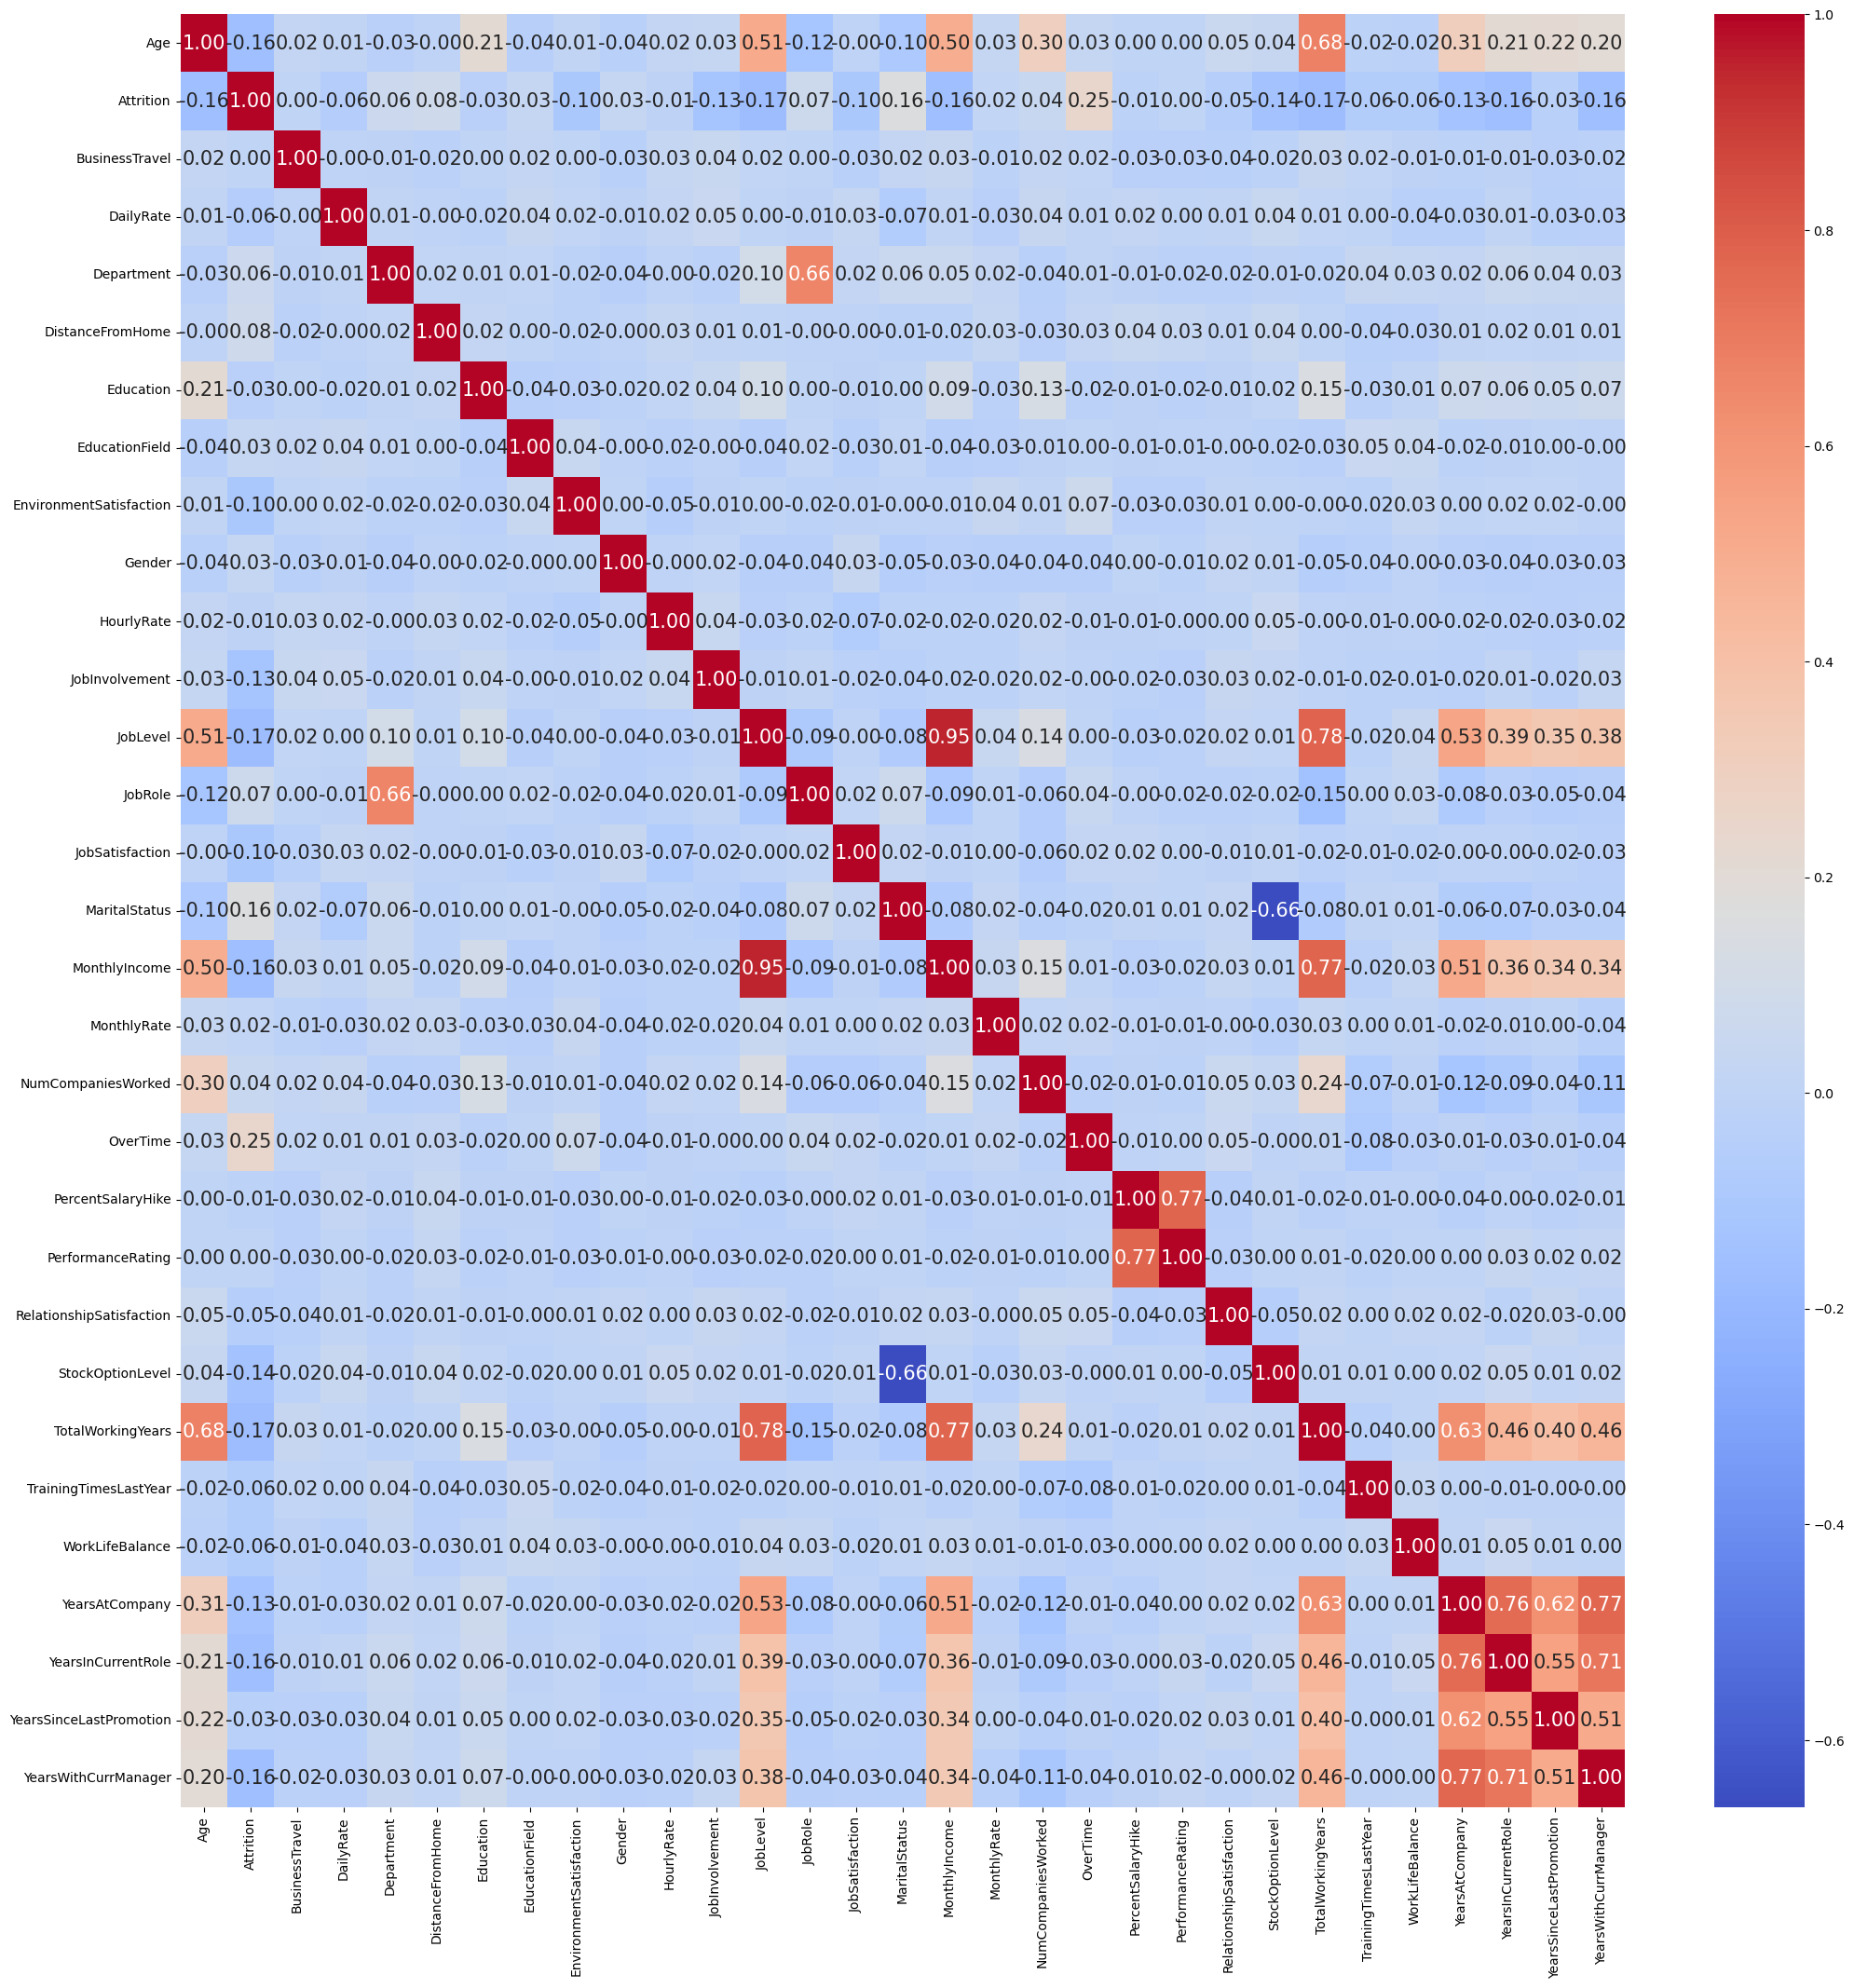

In [11]:
plt.figure(figsize=(25, 25))
sns.heatmap(log.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

In [12]:
# tạo df mới với target y và feature x
df = log[['Attrition','BusinessTravel','Department','DistanceFromHome','EducationField','Gender',
        'JobRole','MaritalStatus','MonthlyRate','NumCompaniesWorked','OverTime','PerformanceRating']]

In [13]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [14]:
y.value_counts()

Attrition
0            1233
1             237
dtype: int64

In [15]:
# cân bằng dl
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print('Dữ liệu trước khi cân bằng:',y.value_counts())
print('Dữ liệu sau khi cân bằng:',y_smote.value_counts())

Dữ liệu trước khi cân bằng: Attrition
0            1233
1             237
dtype: int64
Dữ liệu sau khi cân bằng: Attrition
0            1233
1            1233
dtype: int64


In [16]:
df

,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating
0,1,2,2,1,1,0,7,2,19479,8,1,3
1,0,1,1,8,1,1,6,1,24907,1,0,4
2,1,2,1,2,4,1,2,2,2396,6,1,3
3,0,1,1,3,1,0,6,1,23159,1,1,3
4,0,2,1,2,3,1,2,1,16632,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,23,3,1,2,1,12290,4,0,3
1466,0,2,1,6,3,1,0,1,21457,4,0,3
1467,0,2,1,4,1,1,4,1,5174,1,1,4
1468,0,1,2,2,3,1,7,1,13243,2,0,3


In [17]:
# chuẩn hóa dl z-score or min-max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
cols = ['BusinessTravel','Department','DistanceFromHome','EducationField',
        'JobRole','MaritalStatus','MonthlyRate','NumCompaniesWorked','PerformanceRating']
x_scaled = x_smote.copy()
x_scaled[cols] = scaler.fit_transform(x_smote[cols])

In [19]:
x_scaled.sample(5)

,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating
838,0.5,1.0,0.392857,0.2,1,0.875,1.0,0.014174,0.000000,1,0.0
422,1.0,0.0,0.035714,1.0,1,0.125,1.0,0.656214,0.111111,0,0.0
907,1.0,1.0,0.142857,0.4,1,0.375,0.5,0.267296,0.777778,0,0.0
1180,1.0,0.5,0.214286,0.2,1,0.250,1.0,0.355591,0.222222,0,0.0
635,1.0,0.5,0.285714,0.2,0,0.500,0.5,0.857780,0.111111,1,1.0


In [21]:
x_train.shape, x_test.shape

((1972, 11), (494, 11))

In [22]:
y_train.shape, y_test.shape

((1972, 1), (494, 1))

In [20]:
# tách dl, huấn luyện mô hình
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42, stratify = y_smote)

In [23]:
# Huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# tính độ chính xác tập train và test
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
# Dự đoán trên tập train
x_train_pred = model.predict(x_train)
train = accuracy_score(x_train_pred, y_train)*100
print('Độ chính xác của tập train:',train)

Độ chính xác của tập train: 62.06896551724138


In [26]:
# Dự đoán trên tập test
y_pred = model.predict(x_test)
test = accuracy_score(y_pred, y_test)*100
print('Độ chính xác của tập test:',test)

Độ chính xác của tập test: 60.72874493927125


Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       247
           1       0.62      0.55      0.59       247

    accuracy                           0.61       494
   macro avg       0.61      0.61      0.61       494
weighted avg       0.61      0.61      0.61       494

Confusion Matrix of LogisticRegression() model is:


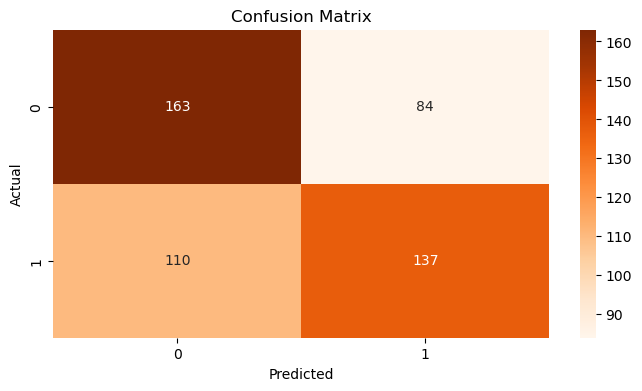

In [27]:
# tạo report và confusion matrix
print(f'Classification Report of {model} model is:')
print(classification_report(y_test,y_pred))
print(f'Confusion Matrix of {model} model is:')
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt='g',cmap='Oranges')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC - AUC Curve of LogisticRegression() model is:


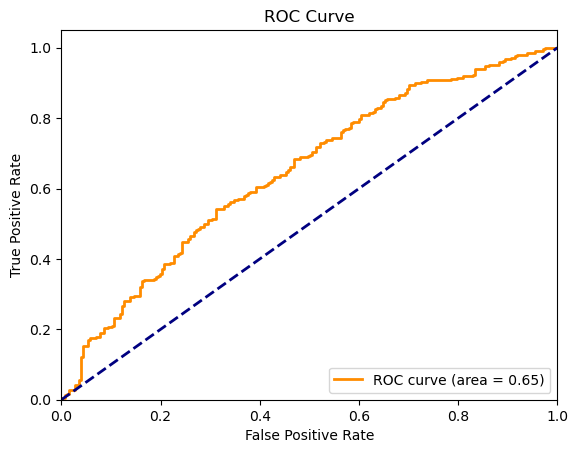

In [29]:
# Vẽ đường cong ROC
from sklearn.metrics import roc_curve, auc

print(f"ROC - AUC Curve of {model} model is:")
y_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()